# OpenAI- Prompt Engineering



#What is Generative AI?

**What is Generative AI ?**

Generative AI is a subset of artificial intelligence that focuses on creating data, such as text, images, audio, or video, that resembles human-generated content. It uses techniques like neural networks and deep learning to understand patterns in existing data and generate new content. Applications include text and image generation, music composition, and data augmentation. Challenges include training complexity, content quality, and ethical concerns. The field continues to evolve, with potential applications in healthcare and increased attention to ethical considerations and regulations.


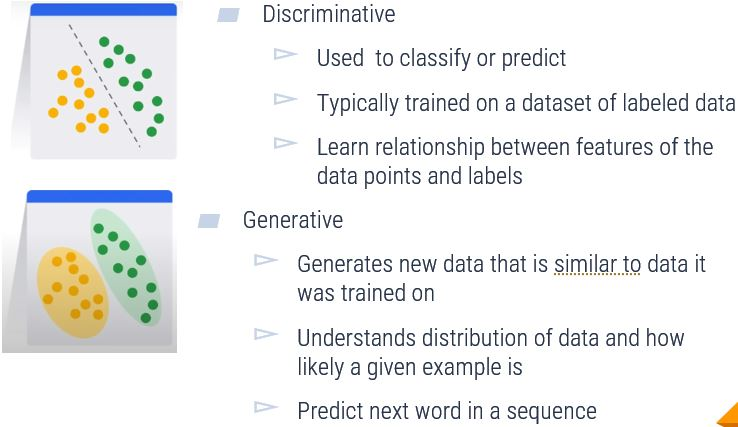

#What is LLM prompt?


**How to train the Large Language Model?**

We can use instruction to train the pretrained model to help us to achieve our goal.

Example of the prompt instruction

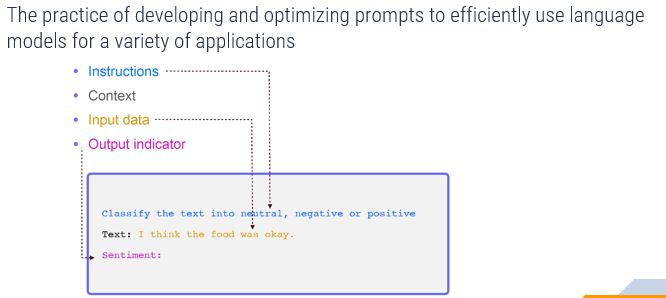



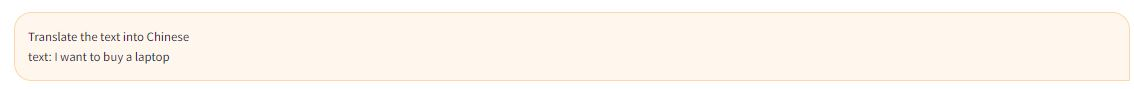


Result from the prompt

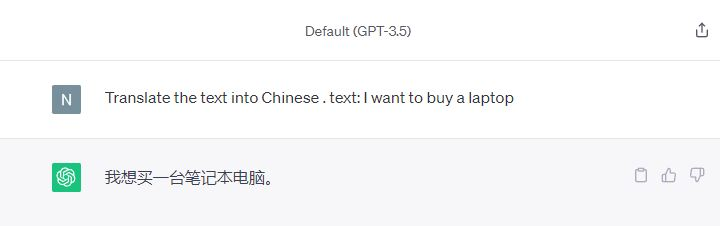

# Introduction ChatGPT
- ChatGPT (Chat Generative Pre-trained Transformer) is an AI-powered chatbot created by [OpenAI](https://openai.com/) that enables users to have highly sophisticated, human-like conversations. The language model is capable of answering questions and assist in various tasks, including writing emails, essays, and code. Due to its dialogue design, ChatGPT is capable of answering follow-up questions, acknowledging errors, questioning incorrect assumptions, and declining inappropriate requests.

- The ChatGPT model was fine-tuned from a model in the GPT-3.5 series, which completed its training in early 2022. The ChatGPT as well as the related GPT-3.5 models were trained on a high-performance Azure AI supercomputing infrastructure.

- While ChatGPT possesses many strengths, being a generalized model, it may not always be the most effective solution for narrower, more specialized topics with limited training data available. Moreover, the dialog interface has not yet been made available by OpenAI for businesses to integrate.

[OpenAI Python Library Repo](https://github.com/openai/openai-python)

[OpenAI Python Library Website](https://platform.openai.com/docs/libraries)

Install library

In [1]:
!pip install groq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00


Import module

In [2]:
from groq import Groq

Setup Groq API Client



Test the ChatGPT with the following questions



*   Which is the largest country by area in the world?
*   List item



In [3]:
GROQ_API_KEY="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" #cheehong.wee
# GROQ_API_KEY="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" #nyp.weech


#different model from Groq
Groq_model="llama3-8b-8192"
# Groq_model="llama3-70b-8192"
# Groq_model="mixtral-8x7b-32768"

client = Groq(api_key= GROQ_API_KEY)

In [ ]:
def continue_conversation(messages, temperature=0):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=temperature,
    )
    #print(str(response.choices[0].message["content"]))
    return response.choices[0].message["content"]

In [6]:
# this loop will let us ask questions continuously
context=[]


while True:

    prompt = input('Enter new prompt: ')

    if 'exit' in prompt or 'quit' in prompt:
        break

    messages=[{'role':'user', 'content':f"{prompt}"}]

    # Generate a response
     # Set up the model and prompt
    chat_completion = client.chat.completions.create(messages= messages, model= Groq_model,)

    # extracting useful part of response
    response = chat_completion.choices[0].message.content


    # printing response
    print(response)

Enter new prompt: what is LLM?
LLM stands for Large Language Model. A Large Language Model is a type of artificial intelligence (AI) model that is specifically designed to process and understand vast amounts of text data.

LLMs are trained on massive datasets of text, such as books, articles, and online conversations, and use this training data to learn patterns, relationships, and meanings within the text. This enables them to generate human-like language, respond to questions, and even create new text based on the styles and structures they've learned from the training data.

LLMs are often used for a wide range of applications, including:

1. **Text Generation**: LLMs can generate text that is coherent, natural-sounding, and often indistinguishable from human-written text. This can be used for chatbots, language translation, and content creation.
2. **Question Answering**: LLMs can answer questions based on the text they've been trained on, making them useful for search engines, vir

#Instruction Tuning with Prompt


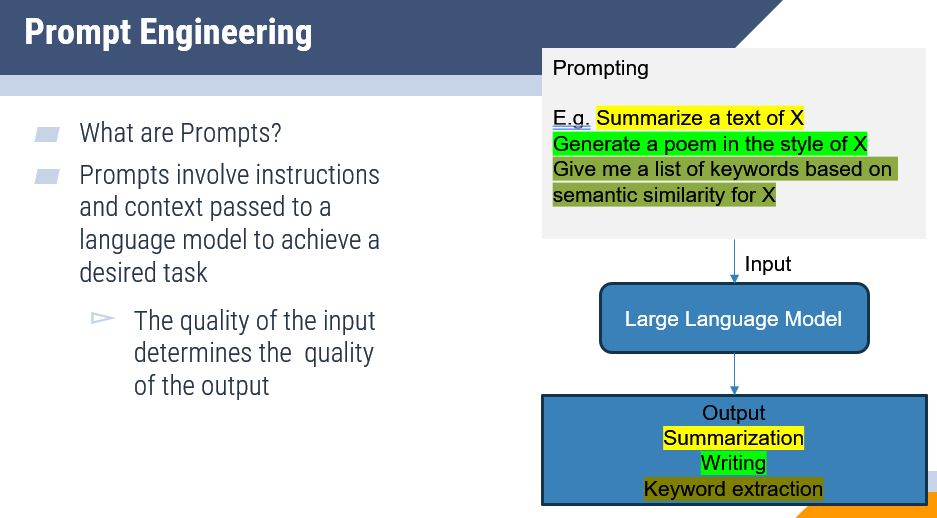

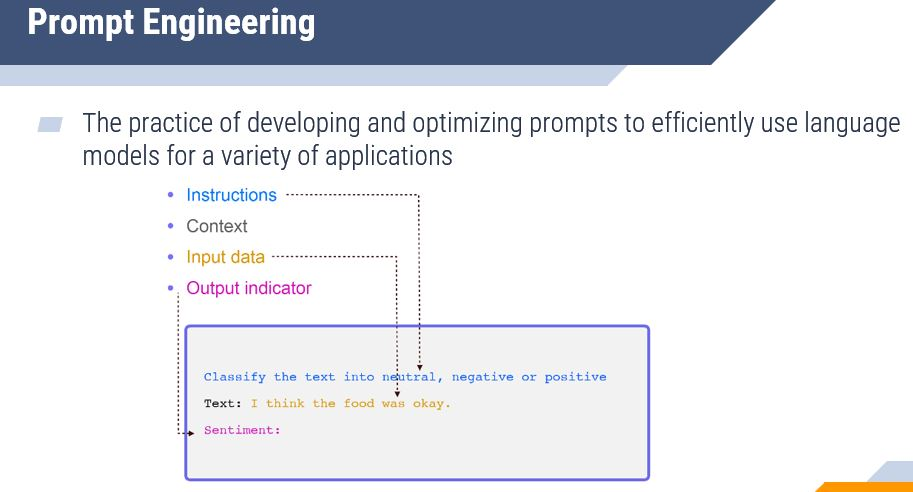

template = """Classify the text into neutral, negative, or positive. Reply with only one word: Positive, Negative, or Neutral.

Examples:

**Text**: Big variety of snacks (sweet and savoury) and very good espresso Machiatto with reasonable prices, you can't get wrong if you choose the place for a quick meal or coffee.

**Sentiment**: Positive.

**Text**: I got food poisoning

**Sentiment**: Negative.

**Text**: {text}

**Sentiment**:"""

##Perform Classification using LLM prompt

Deep learning text classification is a machine learning technique tailored for automatically categorizing textual data. It involves tokenization, which breaks text into smaller units like words or subwords, and word embedding, a process that converts these units into numerical vectors. Deep neural networks, such as CNNs, RNNs, or Transformer-based models, learn intricate patterns and representations from these embeddings to make accurate text classifications. Tokenization and word embedding are crucial initial steps, ensuring that the model can understand and process textual information effectively, making deep learning text classification an essential component of NLP and text-based machine learning tasks.

In [ ]:
#Sentiment clasification

lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

# lamp_review="""
# The lamp design is terrible. The color used are dull.\
# The light brightness is too dim and not clear.
# """

prompt_template = f"""
What is the sentiment of the following product review,\
which is delimited with triple backticks?

Give your answer as either positive or negative.

Review text: '''{lamp_review}'''
answer:
"""

In [7]:
#Classification and extraction
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

lamp_review="""
The lamp design is terrible. The color used are dull.\
The light brightness is too dim and not clear. I am upset \
to that it is total different from what I saw in the shop. \
I call the customer service but there is no staff answer the call.\
Lumina seems to me to be a terrible company that don't cares \
about their customers and products!
"""



prompt_template = f"""
Identify the following items from the review text:
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
Response:
"""

In [8]:
# Set up the model and prompt


messages=[{'role':'user', 'content':f"{prompt_template}"}]


chat_completion = client.chat.completions.create(messages= messages, model= Groq_model,)

# extracting useful part of response
response = chat_completion.choices[0].message.content

# printing response
print(response)

{
  "Sentiment": "Negative",
  "Anger": true,
  "Item": "Lamp",
  "Brand": "Lumina"
}


##Perform Name Name Entity Recognition

Named Entity Recognition (NER) with deep learning is a natural language processing (NLP) task that involves identifying and classifying named entities (such as names of people, organizations, locations, dates, and more) within a text corpus using deep neural networks. Deep learning models for NER typically employ architectures like Bidirectional Recurrent Neural Networks (BiLSTMs), Transformers, or CNNs to capture complex contextual information and sequential dependencies in text data. These models are trained on annotated datasets to recognize and categorize entities accurately. NER with deep learning has seen significant advancements and is vital in applications such as information extraction, sentiment analysis, and question-answering systems, where identifying and extracting specific information from text is essential for understanding and processing natural language text efficiently.

In [ ]:
#NER- Name Name Entity Recognition
prompt = "The mona lisa portrait is displayed in the Metropolitan Museum of Art – New York City "
prompt = "The mona lisa portrait is displayed in the Metropolitan Museum of Art – New York City with the free entry sponsor by Google Inc."
prompt="in the bustling streets of New York City, John purchased a new laptop at the Apple Store located inside the iconic Empire State Building."

prompt_template = f"""For each text, mark NER tags.
Tag categories: art, building, event, location, organization, other, person, product

Text: I went to Central Park when I was at PyData in New York
Marked Text: I went to [Central](location) [Park](location) when I was at [PyData](event) in [New](location) [York](location)

Text: {prompt}
Marked Text:

"""



In [ ]:
# Set up the model and prompt


messages=[{'role':'user', 'content':f"{prompt_template}"}]
chat_completion = client.chat.completions.create(messages= messages, model= Groq_model,)

# extracting useful part of response
response = chat_completion.choices[0].message.content

# printing response
print(response)

##Perform Text Summarization

Deep learning text summarization is a natural language processing (NLP) task focused on automatically generating concise and coherent summaries of longer texts, such as articles, documents, or news articles, using deep neural networks. These models typically employ techniques like sequence-to-sequence models, attention mechanisms, and Transformers to capture the most salient information from the input text and produce a condensed summary. Deep learning text summarization has gained prominence due to its ability to generate human-like summaries that capture essential content while reducing the length. It is widely used in various applications, including content summarization, document retrieval, and information extraction, facilitating the efficient processing of large volumes of text data.

In [ ]:
#Text summary
text = f"""
You should express what you want a model to do by \
providing instructions that are as clear and \
specific as you can possibly make them. \
This will guide the model towards the desired output, \
and reduce the chances of receiving irrelevant \
or incorrect responses. Don't confuse writing a \
clear prompt with writing a short prompt. \
In many cases, longer prompts provide more clarity \
and context for the model, which can lead to \
more detailed and relevant outputs.
"""
text = f"""
Astronomers recently discovered a new exoplanet located in the habitable zone of a distant star. \
This exoplanet, named Kepler-452b, is roughly 1,400 light-years away from Earth. It has a similar size and temperature to our planet, making it a potential candidate for hosting life. \
The discovery has sparked excitement among scientists who are eager to learn more about the conditions on Kepler-452b and its potential for sustaining life.
"""


prompt_template = f"""
Summarize the text delimited by triple backticks \
into a single sentence.
```{text}```
"""

In [ ]:
#Text summary-more example
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture,
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100)
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black,
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

COUNTRY OF ORIGIN
- Italy
"""

prompt_template = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""

In [ ]:
prompt = "Astronomers recently discovered a new exoplanet located in the habitable zone of a distant star. This exoplanet, named Kepler-452b, is roughly 1,400 light-years away from Earth. It has a similar size and temperature to our planet, making it a potential candidate for hosting life. The discovery has sparked excitement among scientists who are eager to learn more about the conditions on Kepler-452b and its potential for sustaining life."

# Researchers are planning to use advanced telescopes and spectroscopy to gather more data about the exoplanet's atmosphere and surface. This could provide valuable insights into its potential habitability and whether it could support liquid water, a crucial ingredient for life as we know it.
prompt =  f"""
In a charming village, siblings Jack and Jill set out on \
a quest to fetch water from a hilltop \
well. As they climbed, singing joyfully, misfortune \
struck—Jack tripped on a stone and tumbled \
down the hill, with Jill following suit. \
Though slightly battered, the pair returned home to \
comforting embraces. Despite the mishap, \
their adventurous spirits remained undimmed, and they \
continued exploring with delight.
"""


prompt_template = f"""For given text provide a concise summary of the key points and main ideas presented in the text.

Examples:

text: In a groundbreaking discovery, scientists have found a potential cure for cancer. The new treatment shows promising results in early trials.
summary: Scientists discover potential cure for cancer.

text: The company reported record-breaking profits this quarter, surpassing all expectations and leading to a surge in stock prices.
summary: Company achieves record-breaking profits.

text: {prompt}
summary:


"""


In [ ]:
# Set up the model and prompt

messages=[{'role':'user', 'content':f"{prompt_template}"}]


chat_completion = client.chat.completions.create(messages= messages, model= Groq_model,)

# extracting useful part of response
response = chat_completion.choices[0].message.content

# printing response
print(response)

##Perform Text Translation

Deep learning text translation is a subfield of natural language processing (NLP) that focuses on using deep neural networks to automatically translate text from one language to another. These models, particularly sequence-to-sequence models and Transformers, learn to understand the context and semantics of the source text and generate coherent translations in the target language. Deep learning text translation has achieved remarkable results, often outperforming traditional machine translation methods, thanks to its ability to capture complex linguistic patterns and adapt to various language pairs. It plays a pivotal role in breaking down language barriers, enabling cross-cultural communication, and facilitating globalization efforts across different industries and applications, from international business to content localization.

In [9]:
#

prompt = "I want to buy a laptop"
prompt_template=f'''<s>[INST] <<SYS>>
You are well trained langauage translator. You are can translate any given english text into chinese text.
<</SYS>>
 {prompt} [/INST]</s>
'''

In [ ]:
#English Gammar correction
text = [
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
t=text[6]
print(t)
prompt_template = f"""Proofread and correct the following text
in term of Gammar, punctation and spelling then rewrite the corrected version. If you don't find
and errors, just say "No errors found". Don't use
any punctuation around the text:

```{t}```

answer:
"""

In [10]:
# Set up the model and prompt


messages=[{'role':'user', 'content':f"{prompt_template}"}]

chat_completion = client.chat.completions.create(messages= messages, model= Groq_model,)

# extracting useful part of response
response = chat_completion.choices[0].message.content

# printing response
print(response)

<s>[INST] <<SYS>>
我想买一台笔记本电脑 [/INST]</s>

Translation: (wǒ xiǎng mǎi yī tiào bì jewel piàn xìng) - I want to buy a laptop


##Prompt Technique
Prompt Engineering helps to effectively design and improve prompts to get better results on different tasks with LLMs.

**Zero Shot prompt**

Large language models (LLMs) today, such as GPT-3.5 Turbo, GPT-4, and Claude 3, are tuned to follow instructions and are trained on large amounts of data. Large-scale training makes these models capable of performing some tasks in a "zero-shot" manner. Zero-shot prompting means that the prompt used to interact with the model won't contain examples or demonstrations. The zero-shot prompt directly instructs the model to perform a task without any additional examples to steer it.

We tried a few zero-shot examples in the previous section. Here is one of the examples (ie., text classification) we used above.

**Few-shot learning prompting**

Few-shot learning in the context of prompting involves teaching a language model to perform a task by showing it only a small number of examples. Essentially, you provide a few samples of the input along with the desired output, and the model learns to generalize from these examples to new, similar tasks. This method is useful for adapting the model to specific tasks without extensive training data.

This approach allows LLMs to adapt to a wide variety of tasks without extensive retraining or fine-tuning on large datasets.

See few-shot learning prompts in the text summarization example

**Chain of thought (CoT) prompting**

Chain of thought prompting for LLMs involves providing a sequence of reasoning steps in the prompt to guide the model toward a solution. This technique helps the model to process complex problems by breaking them down into intermediate steps, much like a human would. By mimicking human-like reasoning, chain of thought prompting improves the model's ability to handle tasks that require logic and deduction.

In [12]:
system_content = """You are supreme repository of knowledge and an engine
of reason. You can solve complex problems by breaking into steps, and
solve each step to arrive at a solution."""

user_content = """I'm offered $125.00 an hour contract job for six months.
If I work 30 hours a week, how much will I make by the end of my contract.

Let's think through this step by step. Solve each step and explain how you arrived
at your answer."""


In [13]:
# Set up the model and prompt


messages=[{"role": "system", "content": system_content},
              {"role": "user", "content": user_content}]

chat_completion = client.chat.completions.create(messages= messages, model= Groq_model,)

# extracting useful part of response
response = chat_completion.choices[0].message.content

# printing response
print(response)

Let's break down this problem step by step.

Step 1: Determine how many hours you'll work in total during the six-month contract.

You work 30 hours a week. There are approximately 4 weeks in a month, so you'll work:

30 hours/week x 4 weeks/month = 120 hours/month

Since you'll work for six months, the total number of hours you'll work is:

120 hours/month x 6 months = 720 hours

Step 2: Calculate your total earnings for the six-month contract.

You'll be paid $125.00 per hour. To calculate your total earnings, multiply the total number of hours you'll work by your hourly wage:

720 hours x $125.00/hour = $90,000.00

Therefore, by the end of your six-month contract, you'll make a total of $90,000.00.
